# <center>Aston University <br/><br/> CS3IVP: Digital Image and Video Processing <br/><br/> Lab 03</center>

Lecturer: Luis J. Manso <a href="mailto:l.manso@aston.ac.uk">l.manso@aston.ac.uk</a> <br/>
Office: MB214D <br/>

## Goals
To revisit previous laboratory sessions.


## Instructions
No submission is required for this laboratory.

## Task 3.1
Assume that `v` and `u` are NumPy matrices of the same size, composed of **a single row** (*e.g.*, $(1.1, 2.1, 0.4, 3.2, 1.4, 9.2)$). Rewrite the code in the following sub-tasks without using any loop.

Advice:
- Creating the `v` and `u` variables will help you check that your answer is correct. For that purpose you can use the NumPy's random array generation function `np.random.random` *e.g.*, `row_vector = np.random.random((1,10))`.
- For task 4.1.b, you can run the loop-based code to check if both solutions give the same values. If you do so, please do not forget to make copies of the matrices, as **the code overwrites** them.
- To make a copy of an array (to avoid one being overwritten) you can use NumPy's `array` constructor: *e.g.*, `copy_of_the_array = np.array(original_array)`.



## Task 3.1.a
The equation $w = v \times u + 5\times u - 10$

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
from skimage.io import imread, imsave, imshow

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)

v, u = np.random.random((1,10)), np.random.random((1,10))t
w = v * u + 5 * u - 10
print(w)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

[[-6.23909205 -8.89423394 -7.15445819 -6.99840633 -8.25126797 -5.22371931
  -6.54634249 -6.48450298 -9.74965053 -9.8671799 ]]


## Task 3.1.b
The following code:
```
for i in range(v.shape[1]):
    v[0,i] = v[0,i]/u[0,i] + cos(2.*pi*u[0,i])
```

In [3]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)
print(v)
v[0] = v[0]/u[0] + cos(2 * pi * u[0])
print(v)
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

[[0.29084768 0.90196916 0.07716403 0.47548756 0.85598882 0.39204334
  0.05318349 0.07340447 0.24304349 0.81545233]]
[[-0.36637789  1.90475208  2.04080167 -0.07302643  0.77192597  0.53537286
   0.15069994  1.05972326 -0.50337413  1.70330362]]


## Task 3.2
Considering the code below. What would be the values of the `x`, `y` and `z` variables after the initial assignment, the call to `function1`, the call to `function2` and the division? That is, in lines 14, 17, 20, and 23. For each of the **four**, provide the values of the three variables.


**Write your answers in the code cell below.**

```
01 def function1(x):
02     return x+1
03 
04 def function2(a, b, z):
05     z = z * 2
06     a = a + z
07     b = a^2
08     return b
09 
10 #  Initial assignments
11 x = np.array( [[ 0,  1]] )
12 y = np.array( [[20, 30]] )
13 z = np.array( [[ 1,  1]] )
14 
15 #  Call to function1
16 x = function1(x)
17 
18 #  Call to function1
19 z = function2(x, y, z)
20 
21 #  Division
22 z = z/2
23
```

In [3]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)

x = np.array( [[ 0,  1]] )
y = np.array( [[20, 30]] )
z = np.array( [[ 1,  1]] )
print(x,y,z)

x = x+1
print(x,y,z)

z = (x + z * 2 )**2
print(x,y,z)

z = z/2
print(x,y,z)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

[[0 1]] [[20 30]] [[1 1]]
[[1 2]] [[20 30]] [[1 1]]
[[1 2]] [[20 30]] [[ 9 16]]
[[1 2]] [[20 30]] [[4.5 8. ]]


## Task 3.3
Write a function `slice` which performs intensity slicing as defined in the "Global Image Enhancement" lecture slides. As arguments, it should take an image matrix, a two-element list containing the critical values defining the slice, and a value to which to send pixels falling between the two critical values. For example, the following call:

`slice(img, [100,150], 0)`

should return a copy of `img` in which all pixels with values in the range $[100,150]$ (inclusive) have been sent to $0$ (black).

Hint: Remember that you can use NumPy's logical operators (*e.g.*, `logical_or`, `logical_and`) to compute a boolean mask.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE OR THE LINES ABOVE)

def slice(m, bounds, sendTo):
    lower, upper = bounds[0], bounds[1]
    m[np.logical_and(m >= lower, m <= upper)] = sendTo
    return m
    
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE OR THE LINES BELOW)

## Task 3.4
Download the image `house.bmp` from Blackboard. In this task, you will use your `slice` function to slice the sky from the image so that its pixels are sent to black.
- Use the function with appropriate values to process the image.
- Display the result.
- Using a histogram to choose good threshold values. Please plot the histogram and state why the values you used are good in a comment.

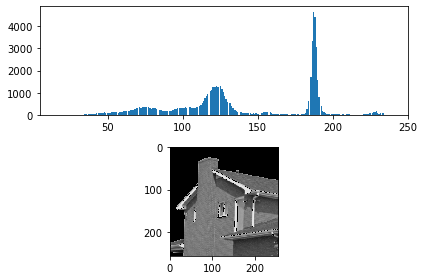

In [34]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

img = imread('house.bmp')
values = np.hstack(img)
figs, axes = plt.subplots(2,1)
axes[0].hist(values, bins=256);
axes[1] = imshow(slice(img, [175,200], 0)) 
'''
 [175,200] is a good range because the histogram shows it to contain many pixels
 of similar colours, and the sky in the image consists of many pixels of similar
 colours.
''';

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)